## Fragestellung: 
### Welche Videospiele-Genres zeigen auf unterschiedlichen Plattformen den größten Erfolg?

**Erläuterung:**
Wir wollen analysieren, ob bestimmte Genres auf unterschiedlichen Plattformen einen größeren Erfolg aufweisen, indem wir Plattformen kategorisieren. Bspw. gehören Nintendo DS und PSP zu portablen Konsolen und die PS, PS2, … zu stationären Konsolen. Den Erfolg definieren wir, indem wir schauen wie viele Verkaufszahlen die jeweiligen Spiele bzw. Genres haben.


Erstellt von: 
Diana Brkic, Zal Kardas, Faisal Karim, Rowan Hussein, Lucas Pepi 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Dataframe einlesen und bereinigen

In [4]:
# Dataframe wird eingelesen und Datentypen werden überprüft
df=pd.read_csv("vgsales.csv", sep=",")
pd.set_option('display.max_columns', 50)
df.dtypes

Rank              object
Name              object
Platform          object
Year             float64
Genre             object
Publisher         object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales;     object
dtype: object

In [5]:
# Schauen, ob Nullwerte vorhanden sind, anscheinend einige
df.isnull().any()

Rank             False
Name              True
Platform          True
Year              True
Genre             True
Publisher         True
NA_Sales          True
EU_Sales          True
JP_Sales          True
Other_Sales       True
Global_Sales;     True
dtype: bool

In [6]:
# Da es Null-Werte gab, werden diese hier gelöscht
df = df.dropna()

In [7]:
# Nochmal schauen, ob alle Nullwerte gelöscht wurden
df.isnull().any()

Rank             False
Name             False
Platform         False
Year             False
Genre            False
Publisher        False
NA_Sales         False
EU_Sales         False
JP_Sales         False
Other_Sales      False
Global_Sales;    False
dtype: bool

In [8]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales;
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01;
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01;
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01;
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01;


In [9]:
anzahl_pc_spiele = len(df[df['Platform'] == 'PC'])
print(f"Anzahl der Zeilen mit 'Platform'='PC': {anzahl_pc_spiele}")

Anzahl der Zeilen mit 'Platform'='PC': 929


In [10]:
# Da die Spalte 'Global_Sales;' ein ";" drin hat, wird dieser hier entfernt, ebenfalls bei den Zahlen in dieser Spalte
df = df.rename(columns={'Global_Sales;': 'Global_Sales'})
df['Global_Sales'] = df['Global_Sales'].str.replace(';', '')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [11]:
# Kategorien definieren
standkonsolen = ['PS', 'PS2', 'PS3', 'PS4', 'X360', 'XB', 'XOne', 'SAT', '2600', 'GEN', '3DO', 'TG16', 'PCFX', 'DC', 'NG', 'SCD']
portable_konsolen = ['PSP', 'PSV', 'WS', 'GG']
nintendo_standkonsolen = ['SNES', 'N64', 'GC', 'Wii', 'WiiU', 'NES']
nintendo_portable_konsolen = ['DS', 'GBA', '3DS', 'GB']
pc = ['PC']

# Funktion zur Kategorisierung erstellen
def kategorisiere_plattform(plattform):
    if plattform in standkonsolen:
        return 'Standkonsolen'
    elif plattform in portable_konsolen:
        return 'Portable Konsolen'
    elif plattform in nintendo_standkonsolen:
        return 'Nint. Standkonsolen'
    elif plattform in nintendo_portable_konsolen:
        return 'Nint. Portable Konsolen'
    elif plattform in pc:
        return 'PC'

# Neue Spalte erstellen und Plattformen kategorisieren
df['Kategorie'] = df['Platform'].apply(kategorisiere_plattform)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Kategorie
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nint. Standkonsolen
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nint. Standkonsolen
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nint. Standkonsolen
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33,Nint. Standkonsolen
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nint. Portable Konsolen
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Nint. Portable Konsolen
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nint. Standkonsolen
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Standkonsolen
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nint. Portable Konsolen


### Wie viele Sales haben die einzelnen Plattformen?

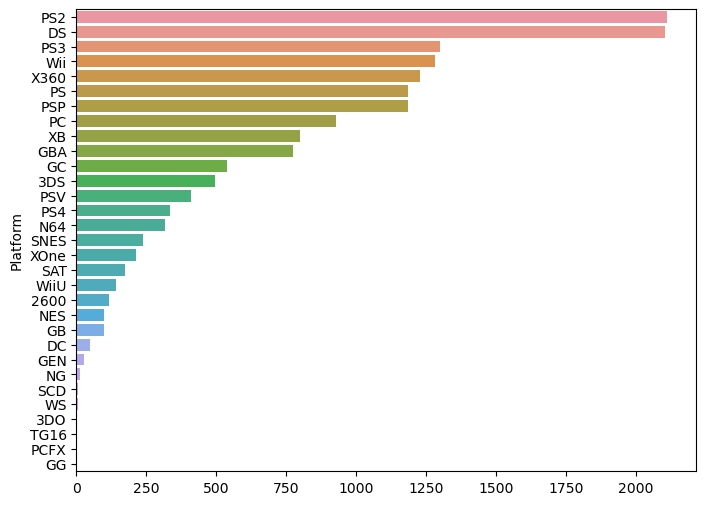

In [12]:
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.show()

In dieser Tabelle kann man erkennen, dass die Playstation 2 und die Nintendo DS zu diesem Zeitpunkt die meisten Sales hatten.

### Wie viele Sales haben die neu erstellen Kategorien?

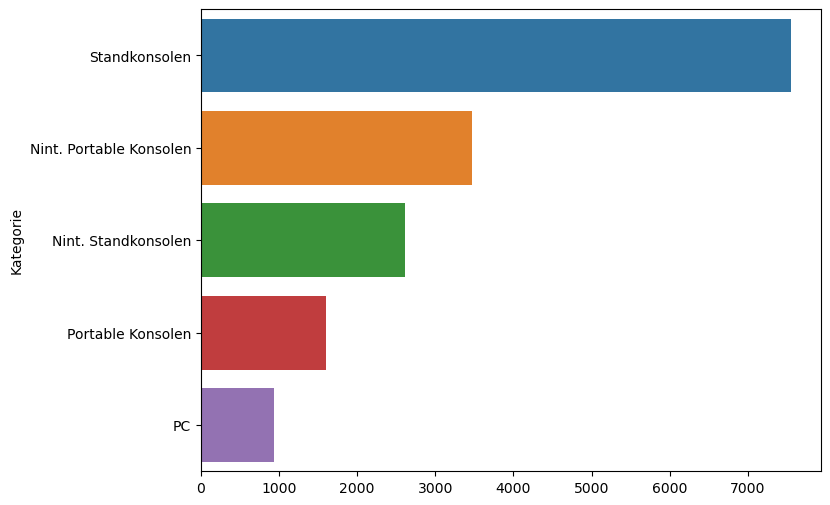

In [13]:
platGenre = pd.crosstab(df.Kategorie,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.show()

Hier sieht man, dass die Stationären Konsolen am meisten Verkaufszahlen haben, wobei die portobalen Konsolen von Nintendo auch sehr viele haben, obwohl sie 6 mal so weniger Konsolen beinhalten.

### Welche Publisher haben die meisten Sales in den Top 100?

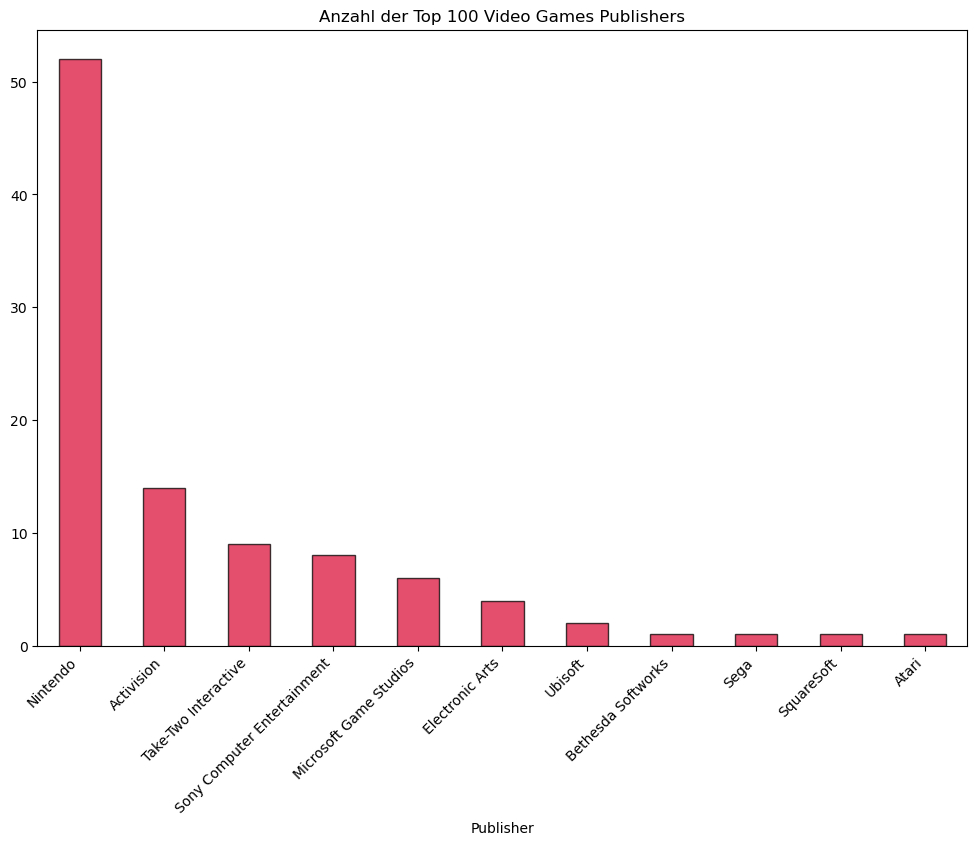

In [14]:
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')  # 'coerce' wandelt nicht konvertierbare Werte in NaN um
df_filtered = df[df['Rank'] < 100]

# Hier werden nur die Publisher der Top 100 Ranks genommen 
top_100_publishers = df_filtered['Publisher'].value_counts().head(100)

# Histogramm erstellen
plt.figure(figsize=(12, 8))
top_100_publishers.plot(kind='bar', color='crimson', edgecolor='black', alpha=0.75)
plt.title('Anzahl der Top 100 Video Games Publishers')
plt.xticks(rotation=45, ha='right') 
plt.show()

Nintendo hat in den Top 100 Spielen mit großem Abstand die meisten Verkaufszahlen.

### Welche Genres sind auf den Kategorisierten Plattformen am beliebtesten?

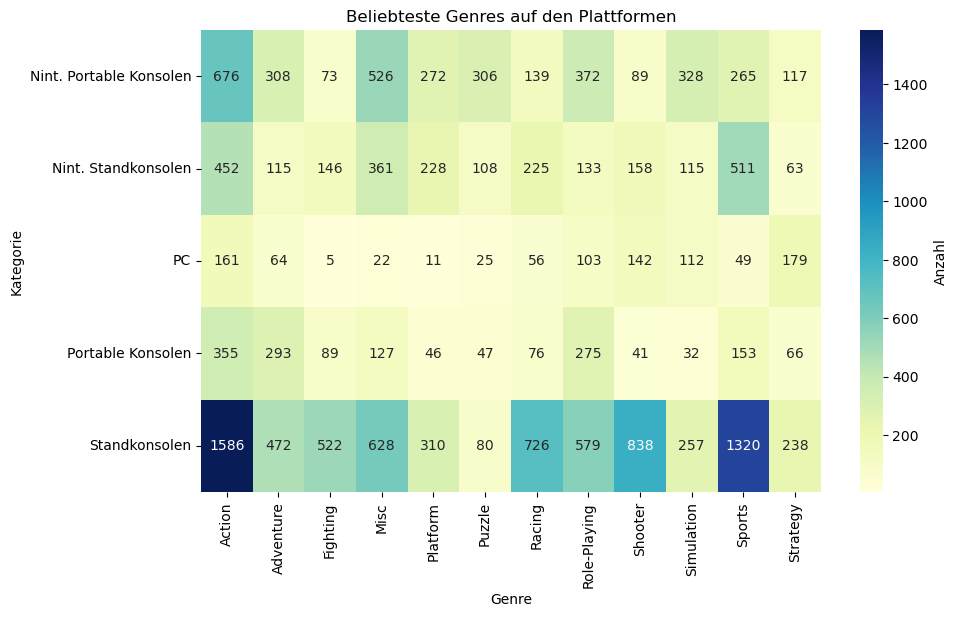

In [15]:
# Crosstab zwischen Kategorie und Genre
genre_platform_counts = pd.crosstab(df.Kategorie,df.Genre)

# Erstelle eine Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_platform_counts, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Anzahl'})
plt.title('Beliebteste Genres auf den Plattformen')
plt.show()

Folgend sieht man, welche Genres am meisten verkauft worden sind, bei den einzelnen Kategorien:

In [16]:
# Finde das beliebteste Genre für jede Plattform
most_popular_genre_per_platform = genre_platform_counts.idxmax(axis=1)

# Ausgabe der Plattformen mit dem beliebtesten Genre
for platform, genre in most_popular_genre_per_platform.items():
    print(f'Beliebtestes Genre auf der Plattform {platform}: {genre}')

Beliebtestes Genre auf der Plattform Nint. Portable Konsolen: Action
Beliebtestes Genre auf der Plattform Nint. Standkonsolen: Sports
Beliebtestes Genre auf der Plattform PC: Strategy
Beliebtestes Genre auf der Plattform Portable Konsolen: Action
Beliebtestes Genre auf der Plattform Standkonsolen: Action


#### Hiermit wird unsere Forschungsfrage beantwortet; Im Jahre 2017 sieht man, dass das Gerne "Action" bei fast allen Konsolen Verkaufsschlager war, wobei das Genre "Strategy" bei PC Spielern ein wenig interessanter war und wahrscheinlich durch die Wii und WiiU ist das Genre "Sports" bei den Standkonsolen von Nintendo am beliebtesten.

### Welche Genres waren in den einzelnen Jahren am beliebtesten?
Hier wird herausgefunden welche Genres in den einzelnen Jahren am häufigsten released wurden, daran messen wir die Beliebtheit.

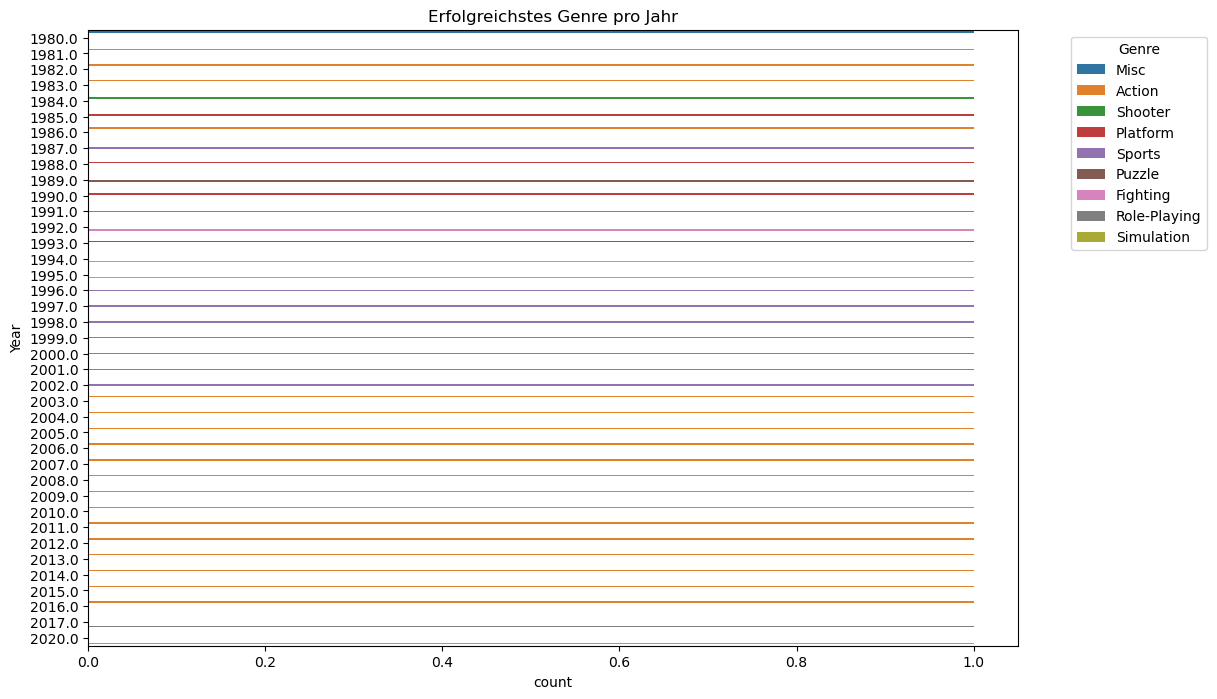

In [17]:
# df wird nach 'Year' gruppiert, dann wird nur die 'Genre'-Spalte ausgewählt
# Alle Genres, die in diesen Jahren veröffentlicht wurden, werden zusammengerechnet und das max Genre wird ausgegeben 
successful_genres = df.groupby('Year')['Genre'].apply(lambda x: x.value_counts().idxmax()).reset_index()

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
sns.countplot(y='Year', hue='Genre', data=successful_genres)
plt.title('Erfolgreichstes Genre pro Jahr')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
# Gleich wie oben
successful_genres = df.groupby('Year')['Genre'].apply(lambda x: x.value_counts().idxmax()).reset_index()

# Genres pro Jahr ausgeben
for index, row in successful_genres.iterrows():
    year = row['Year']
    genre = row['Genre']
    print(f'Erfolgreichstes Genre im Jahr {year}: {genre}')
plt.show()

Erfolgreichstes Genre im Jahr 1980.0: Misc
Erfolgreichstes Genre im Jahr 1981.0: Action
Erfolgreichstes Genre im Jahr 1982.0: Action
Erfolgreichstes Genre im Jahr 1983.0: Action
Erfolgreichstes Genre im Jahr 1984.0: Shooter
Erfolgreichstes Genre im Jahr 1985.0: Platform
Erfolgreichstes Genre im Jahr 1986.0: Action
Erfolgreichstes Genre im Jahr 1987.0: Sports
Erfolgreichstes Genre im Jahr 1988.0: Platform
Erfolgreichstes Genre im Jahr 1989.0: Puzzle
Erfolgreichstes Genre im Jahr 1990.0: Platform
Erfolgreichstes Genre im Jahr 1991.0: Sports
Erfolgreichstes Genre im Jahr 1992.0: Fighting
Erfolgreichstes Genre im Jahr 1993.0: Platform
Erfolgreichstes Genre im Jahr 1994.0: Fighting
Erfolgreichstes Genre im Jahr 1995.0: Fighting
Erfolgreichstes Genre im Jahr 1996.0: Sports
Erfolgreichstes Genre im Jahr 1997.0: Sports
Erfolgreichstes Genre im Jahr 1998.0: Sports
Erfolgreichstes Genre im Jahr 1999.0: Sports
Erfolgreichstes Genre im Jahr 2000.0: Sports
Erfolgreichstes Genre im Jahr 2001.0: Spor

Hier, und im Balkendiagramm oben, sieht man in welchen Jahren bestimmte Genres am meisten veröffentlicht wurden. Die Genres "Action" und "Sports" haben einen hohen Anteil, weswegen man daraus eventuell ableiten kann, dass diese Genres die beliebtesten sind.

## ENDE